# Тема 10. Байесовский анализ

In [2]:
import numpy as np
import pandas as pd
import math as mt
import scipy.stats as st
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import namedtuple
from tqdm import tqdm

### 1 Задание

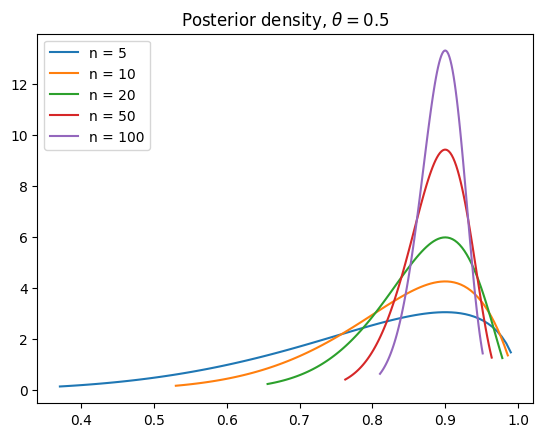

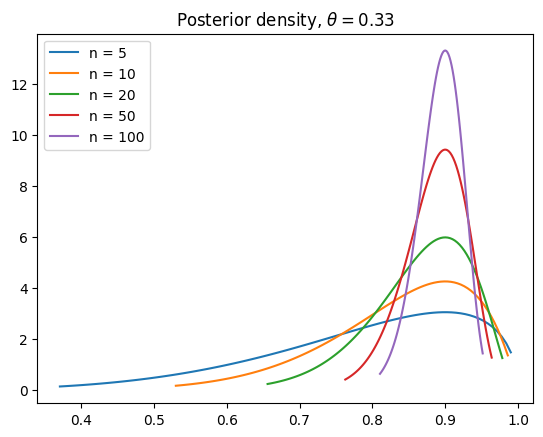

In [3]:
Ns = (5, 10, 20, 50, 100)
thetas = (0.5, 1/3)

for theta in thetas:
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_title(fr"Posterior density, $\theta = {round(theta, 2)}$")
    for n in Ns:
        sample = st.bernoulli.rvs(p=theta, size=n)
        #sum = np.sum(sample)
        sum = 0.9 * n
        a = sum + 1
        b = n - sum + 1
        rv = st.beta(a, b)
        x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
        y = rv.pdf(x)
        ax.plot(x, y, label=f"n = {n}")
        ax.legend()

### 2 Задание

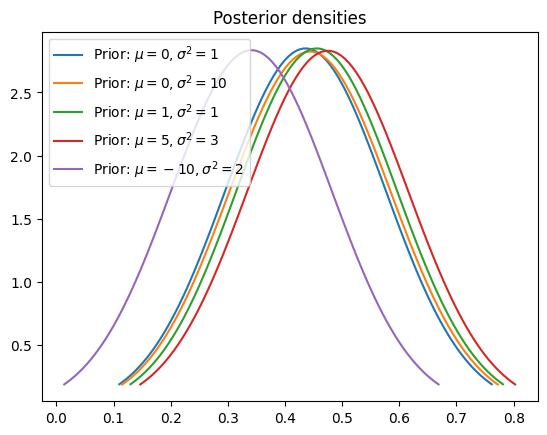

In [44]:
prior_hyperparameters = (
    (0, 1),
    (0, 10),
    (1, 1),
    (5, 3),
    (-10, 2)
)
theta = 0.5
n = 50

sample = st.norm.rvs(size=n, loc=theta, scale=1)
sum = np.sum(sample)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Posterior densities")

for mu, var in prior_hyperparameters:
    rv = st.norm((mu / var + sum) / (1 / var + n), 1 / mt.sqrt(1 / var + n))
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
    y = rv.pdf(x)
    ax.plot(x, y, label=fr"Prior: $\mu = {mu}, \sigma^2 = {var}$")
    ax.legend()

$$
    \frac{1}{\frac{1}{\sigma^2} + n} (\frac{\mu}{\sigma^2} + \sum x_i) = 
    \frac{\mu}{1 + \sigma^2 n} + \frac{\sum x_i}{\frac{1}{\sigma^2} + n} \approx
    \frac{\mu}{1 + \sigma^2 n} + \frac{\theta}{1 + \frac{1}{\sigma^2n}}
$$

### 3 Задание

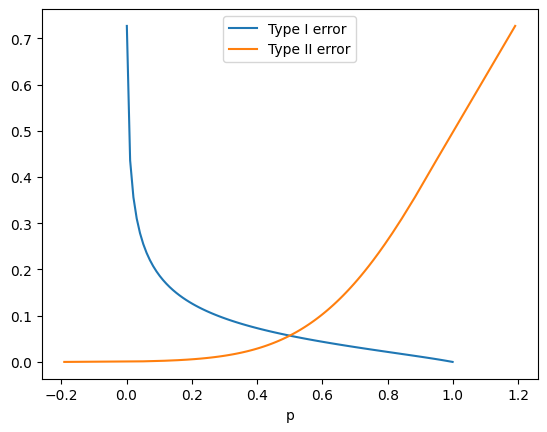

In [5]:
L_1 = 1
L_2 = 1
n = 10
p = np.linspace(0.001, 0.999, 100)
q = 1 - p

fig = plt.figure()
ax = fig.add_subplot()

rv_1 = st.norm(0, 1/mt.sqrt(n))
rv_2 = st.norm(1, 1/mt.sqrt(n))
C = 0.5 + 1/n * np.log( (L_1 * p) / (L_2 * q) )
ax.plot(p, 1-rv_1.cdf(C), label="Type I error")
ax.plot(C, rv_2.cdf(C), label="Type II error")
ax.set_xlabel("p")
ax.legend();